In [0]:
import pandas as pd
import datetime
dados = pd.read_csv('base_data.csv',sep=',')
dados = dados.dropna(axis=1, how='any')
dados = dados[(dados['forecastType'] == 'BRB2') & (dados['stationHWID'] == 'A12') & ( dados['pc_obs'] != 0) & (dados['pc_prev'] != 0)]
dados['forecastDate'] = pd.to_datetime(dados['forecastDate'], format='%Y-%m-%d %H:%M:%S')
dados['hour'] = pd.to_datetime(dados['hour'], format='%Y-%m-%d %H:%M:%S')
dados['delta_date'] = (dados['hour']-dados['forecastDate']).dt.days
dados = dados[(dados['delta_date']<=0)]

In [0]:
dados.dtypes

forecastType            object
stationHWID             object
forecastDate    datetime64[ns]
hour            datetime64[ns]
ps_prev                float64
rh_prev                float64
tp_prev                float64
tc_prev                float64
rd_prev                float64
ws_prev                float64
pc_prev                float64
pc_obs                 float64
delta_date               int64
dtype: object

In [0]:
dados.head()

,forecastType,stationHWID,forecastDate,hour,ps_prev,rh_prev,tp_prev,tc_prev,rd_prev,ws_prev,pc_prev,pc_obs,delta_date
13,BRB2,A12,2019-05-31 03:00:00,2019-05-31 04:00:00,1008.0,70.1,27.30,1.00,0.0,3.63,0.1,4.84,0
14,BRB2,A12,2019-05-31 03:00:00,2019-05-31 05:00:00,1008.2,73.5,26.74,0.94,0.0,1.95,0.2,1.27,0
15,BRB2,A12,2019-05-31 03:00:00,2019-05-31 06:00:00,1009.0,77.0,26.07,0.98,0.0,1.06,0.1,0.26,0
16,BRB2,A12,2019-05-31 03:00:00,2019-05-31 07:00:00,1008.7,80.1,25.35,1.00,0.0,1.66,0.1,0.26,0
27,BRB2,A12,2019-06-01 03:00:00,2019-06-01 07:00:00,1008.2,89.8,24.31,1.00,0.0,1.02,0.7,0.26,0


In [0]:
max(dados['pc_obs'])

18.11

In [0]:
dados.shape

(195, 13)

In [0]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'pc_prev')

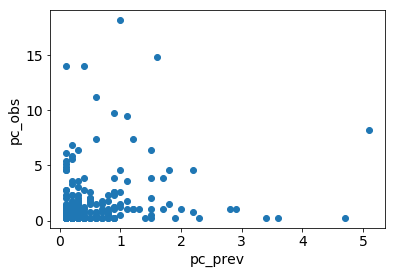

In [0]:
plt.rcParams.update({'font.size': 14})
plt.scatter(dados['pc_prev'],dados['pc_obs'])
plt.ylabel('pc_obs')
plt.xlabel('pc_prev')

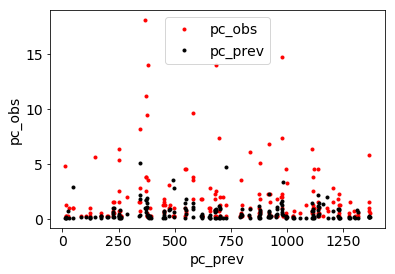

In [0]:
plt.plot(dados['pc_obs'],'.r')
plt.plot(dados['pc_prev'],'.k')
plt.legend(['pc_obs','pc_prev'])
plt.ylabel('pc_obs')
plt.xlabel('pc_prev')
plt.show()

In [0]:
import numpy as np

In [0]:
y = dados[ 
          'pc_obs'].values

In [0]:
X = dados[
          [           
           
          'ps_prev',		'tp_prev',	'tc_prev',	'rd_prev',	'ws_prev',	'pc_prev','rh_prev'
    ]
    ].values
print(X)

[[1.0080e+03 2.7300e+01 1.0000e+00 ... 3.6300e+00 1.0000e-01 7.0100e+01]
 [1.0082e+03 2.6740e+01 9.4000e-01 ... 1.9500e+00 2.0000e-01 7.3500e+01]
 [1.0090e+03 2.6070e+01 9.8000e-01 ... 1.0600e+00 1.0000e-01 7.7000e+01]
 ...
 [1.0117e+03 2.3710e+01 9.2000e-01 ... 1.7500e+00 2.0000e-01 8.1600e+01]
 [1.0125e+03 2.5730e+01 9.0000e-01 ... 4.6600e+00 2.0000e-01 7.3900e+01]
 [1.0126e+03 2.6210e+01 9.6000e-01 ... 5.3900e+00 2.0000e-01 7.1000e+01]]


In [0]:
X = X/np.amax(X,axis=0)
print(X, len(X))

[[0.99339706 0.97430407 1.         ... 0.49253731 0.01960784 0.75783784]
 [0.99359417 0.95431834 0.94       ... 0.26458616 0.03921569 0.79459459]
 [0.99438258 0.93040685 0.98       ... 0.14382632 0.01960784 0.83243243]
 ...
 [0.99704346 0.8461813  0.92       ... 0.23744912 0.03921569 0.88216216]
 [0.99783187 0.91827266 0.9        ... 0.63229308 0.03921569 0.79891892]
 [0.99793042 0.93540328 0.96       ... 0.73134328 0.03921569 0.76756757]] 195


In [0]:
ymax=np.amax(y)
y = y/ymax
print(y, len (y))

[0.26725566 0.070127   0.01435671 0.01435671 0.01435671 0.05632247
 0.05632247 0.05632247 0.01435671 0.01435671 0.05632247 0.02816124
 0.01435671 0.30977361 0.02816124 0.01435671 0.01435671 0.01435671
 0.01435671 0.01435671 0.02816124 0.04251795 0.08448371 0.02816124
 0.08448371 0.14080618 0.35229155 0.2954169  0.04251795 0.08448371
 0.04251795 0.01435671 0.01435671 0.01435671 0.11264495 0.08448371
 0.04251795 0.45057979 0.08448371 0.15461071 1.         0.61954721
 0.21093319 0.21093319 0.05632247 0.14080618 0.01435671 0.01435671
 0.02816124 0.52125897 0.7747101  0.19712866 0.01435671 0.01435671
 0.05632247 0.01435671 0.070127   0.04251795 0.08448371 0.09828824
 0.02816124 0.070127   0.16896742 0.05632247 0.070127   0.01435671
 0.05632247 0.01435671 0.01435671 0.05632247 0.25345113 0.01435671
 0.25345113 0.02816124 0.04251795 0.09884042 0.5350635  0.19712866
 0.21148537 0.09828824 0.09828824 0.01435671 0.01435671 0.01435671
 0.05632247 0.05632247 0.04251795 0.15461071 0.12644948 0.0982

In [0]:
def sigmoid(Soma):
    return 1/(1+np.exp(-Soma))

def relu(Soma):
    return np.maximum(0,Soma)

In [0]:
arquitetura = [
    {"dim_entrada": 7, "dim_saida": 100, "ativacao": "relu"},
    {"dim_entrada": 100, "dim_saida": 100, "ativacao": "relu"},
    {"dim_entrada": 100, "dim_saida": 1000, "ativacao": "relu"},    
    {"dim_entrada": 1000, "dim_saida": 100, "ativacao": "relu"},
    {"dim_entrada": 100, "dim_saida": 1, "ativacao": "sigmoid"},
    
]

In [0]:
def inicia_camadas(arquitetura, seed = 99):
    # inicia os valores aleatórios
    np.random.seed(seed)
    # numero de camadas da rede neural
    numero_de_camadas = len(arquitetura)
    # inicia armazenamento de parametros
    valores_parametros = {}
    
    # itera nas camadas da rede
    for indice, camada in enumerate(arquitetura):
        
        indice_camada = indice + 1
        
        # extrai o numero de nodos nas camadas
        tamanho_camada_entrada = camada["dim_entrada"]
        tamanho_camada_saida = camada["dim_saida"]
        
        # inicia os valores na matriz de pesos P
        # e o vetor de viés ou bias b
        valores_parametros['P' + str(indice_camada)] = np.random.randn(
            tamanho_camada_saida, tamanho_camada_entrada)  * 0.1
        valores_parametros['b' + str(indice_camada)] = np.random.randn(
            tamanho_camada_saida, 1) * 0.1
        
    return valores_parametros

In [0]:
def propaga_uma_camada(Ativado_anterior, Pesos_atual, b_atual, ativacao="relu"):
    # cálculo da entrada para a função de ativação
    Saida_atual = np.dot(Pesos_atual, Ativado_anterior) + b_atual
    
    # selecção da função de ativação
    if ativacao is "relu":
        func_ativacao = relu
    elif ativacao is "sigmoid":
        func_ativacao = sigmoid
    else:
        raise Exception('Ainda não implementamos essa funcao')
        
    # retorna a ativação calculada Ativado_atual e a matriz intermediária Saida
    return func_ativacao(Saida_atual), Saida_atual

In [0]:
def propaga_total(X, valores_parametros, arquitetura):
    # memoria temporaria para a retropropagacao
    memoria = {}
    # O vetor X é a ativação para a camada 0 
    Ativado_atual = X
    
    # iterações para as camadas
    for indice, camada in enumerate(arquitetura):
        # a numeração das camadas começa de 1
        indice_camada = indice + 1
        # utiliza a ativação da iteração anterior
        Ativado_anterior = Ativado_atual
        
        # extrai a função de ativação para a camada atual
        func_ativacao_atual = camada["ativacao"]
        # extrai os pesos da camada atual
        Pesos_atual = valores_parametros["P" + str(indice_camada)]
        # extrai o bias para a camada atual
        b_atual = valores_parametros["b" + str(indice_camada)]
        # cálculo da ativação para a camada atual
        Ativado_atual, Saida_atual = propaga_uma_camada(Ativado_anterior, Pesos_atual, b_atual, func_ativacao_atual)
        
        # salca os valores calculados na memória
        memoria["A" + str(indice)] = Ativado_anterior
        memoria["Z" + str(indice_camada)] = Saida_atual
       
    # retorna o vetor predito e um dicionário contendo os valores intermediários
    return Ativado_atual, memoria

In [0]:
valores_parametros = inicia_camadas(arquitetura, seed = 99)
y_estimado, memoria = propaga_total(np.transpose(X), valores_parametros, arquitetura)

In [0]:
y_estimado[0,0]*ymax

8.200825821117824

In [0]:
y[0]*ymax

4.84

In [0]:
def atualiza(valores_parametros, gradidentes, arquitetura, taxa_aprendizagem):

    # iterações pelas camadas
    for indice_camada, camada in enumerate(arquitetura, 1):
        valores_parametros["P" + str(indice_camada)] -= taxa_aprendizagem * gradidentes["dP" + str(indice_camada)]        
        valores_parametros["b" + str(indice_camada)] -= taxa_aprendizagem * gradidentes["db" + str(indice_camada)]

    return valores_parametros;

In [0]:
def valor_de_custo(Y_predito, Y):
    # numero_de_exemplos
    m = Y_predito.shape[1]
    
    custo = -1 / m * (np.dot(Y, np.log(Y_predito).T) + np.dot(1 - Y, np.log(1 - Y_predito).T))
    return np.squeeze(custo)

In [0]:
def retropropagacao_total(Y_predito, Y, memoria, valores_parametros, arquitetura):
   
    gradientes = {}
    
    # numero de exemplos
    #m = Y.shape[1]
    # para garantir que os dois vetores tenham a mesma dimensão
    Y = Y.reshape(Y_predito.shape)
    
    # inicia o algoritmo de gradiente descendente
    dAtivado_anterior = - (np.divide(Y, Y_predito) - np.divide(1 - Y, 1 - Y_predito));
    
    for indice_camada_anterior, camada in reversed(list(enumerate(arquitetura))):
        
        indice_camada_atual = indice_camada_anterior + 1
        # Função de ativação para a camada atual
        
        funcao_ativao_atual = camada["ativacao"]
        
        dAtivado_atual = dAtivado_anterior
        
        Ativado_anterior = memoria["A" + str(indice_camada_anterior)]
        Saida_atual = memoria["Z" + str(indice_camada_atual)]
        
        Pesos_atual = valores_parametros["P" + str(indice_camada_atual)]
        b_atual = valores_parametros["b" + str(indice_camada_atual)]
        
        dAtivado_anterior, dPesos_atual, db_atual = retropropagacao_uma_camada(
            dAtivado_atual, Pesos_atual, b_atual, Saida_atual, Ativado_anterior, funcao_ativao_atual)
        
        gradientes["dP" + str(indice_camada_atual)] = dPesos_atual
        gradientes["db" + str(indice_camada_atual)] = db_atual
    
    return gradientes

In [0]:
def sigmoid_retro(dAtivado, Saida):
    sig = sigmoid(Saida)
    return dAtivado * sig * (1 - sig)

def relu_retro(dAtivado, Saida):
    dSaida = np.array(dAtivado, copy = True)
    dSaida[Saida <= 0] = 0;
    return dSaida;

In [0]:
def retropropagacao_uma_camada(dAtivado_atual, Pesos_atual, b_atual, Saida_atual, Ativado_anterior, ativacao="relu"):
    # número de exemplos
    m = Ativado_anterior.shape[1]
    
    # seleção função de ativação
    if ativacao is "relu":
        func_ativacao_retro = relu_retro
    elif ativacao is "sigmoid":
        func_ativacao_retro = sigmoid_retro
    else:
        raise Exception('Ainda não implementamos essa funcao')
    
    # derivada da função de ativação
    dSaida_atual = func_ativacao_retro(dAtivado_atual, Saida_atual)
    
    # derivada da matriz de Pesos
    dPesos_atual = np.dot(dSaida_atual, Ativado_anterior.T) / m
    # derivada do vetor b
    db_atual = np.sum(dSaida_atual, axis=1, keepdims=True) / m
    # derivada da matriz A_anterior
    dAtivado_anterior = np.dot(Pesos_atual.T, dSaida_atual)

    return dAtivado_anterior, dPesos_atual, db_atual

In [0]:
def treino(X, Y,X_teste,Y_teste, arquitetura, epocas, taxa_aprendizagem):
    # Inicia os parâmetros da rede neural
    valores_parametros = inicia_camadas(arquitetura, 2)
    # Listas que vão guardar o progresso da aprendizagem da rede 
    historia_custo = []
    historia_custo_teste = []
   
    
    # Atualiza a cada época
    for i in range(epocas):
        # Propaga a rede - Foward propagation
        Y_predito, memoria = propaga_total(X, valores_parametros, arquitetura)
        
        Y_predito_teste, memoria2 = propaga_total(X_teste, valores_parametros, 
                                                  arquitetura)
        
        # calcula as métricas e salva nas listas de história
        custo = valor_de_custo(Y_predito, Y)
        historia_custo.append(custo)
        custo_teste = valor_de_custo(Y_predito_teste, Y_teste)
        historia_custo_teste.append(custo_teste)
        
        
        # Retropropagação - Backpropagation
        gradientes = retropropagacao_total(Y_predito, Y, memoria, 
                                           valores_parametros, arquitetura)
        # Atualiza os pesos
        valores_parametros = atualiza(valores_parametros, gradientes, 
                                      arquitetura, taxa_aprendizagem)
        
        if(i % 50 == 0):
            
            print("Iteração: {:05} - custo: {:.5f} ".format(i, custo))
            
            
    return valores_parametros, historia_custo, historia_custo_teste

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_treino, X_teste, y_treino, y_teste = train_test_split( X, y, test_size=0.43, random_state=42)

In [0]:
# Treinamento
valores_parametros, historia_custo, historia_custo_teste = treino(np.transpose(X_treino), np.transpose(y_treino.reshape((y_treino.shape[0], 1))), 
                                                                  np.transpose(X_teste), np.transpose(y_teste.reshape((y_teste.shape[0], 1))), 
                                                                  arquitetura, 20000, 0.01)

Iteração: 00000 - custo: 0.56956 
Iteração: 00050 - custo: 0.33761 
Iteração: 00100 - custo: 0.33577 
Iteração: 00150 - custo: 0.33541 
Iteração: 00200 - custo: 0.33512 
Iteração: 00250 - custo: 0.33485 
Iteração: 00300 - custo: 0.33464 
Iteração: 00350 - custo: 0.33444 
Iteração: 00400 - custo: 0.33424 
Iteração: 00450 - custo: 0.33403 
Iteração: 00500 - custo: 0.33382 
Iteração: 00550 - custo: 0.33354 
Iteração: 00600 - custo: 0.33332 
Iteração: 00650 - custo: 0.33312 
Iteração: 00700 - custo: 0.33294 
Iteração: 00750 - custo: 0.33277 
Iteração: 00800 - custo: 0.33260 
Iteração: 00850 - custo: 0.33244 
Iteração: 00900 - custo: 0.33228 
Iteração: 00950 - custo: 0.33211 
Iteração: 01000 - custo: 0.33194 
Iteração: 01050 - custo: 0.33176 
Iteração: 01100 - custo: 0.33159 
Iteração: 01150 - custo: 0.33142 
Iteração: 01200 - custo: 0.33125 
Iteração: 01250 - custo: 0.33109 
Iteração: 01300 - custo: 0.33093 
Iteração: 01350 - custo: 0.33078 
Iteração: 01400 - custo: 0.33063 
Iteração: 0145

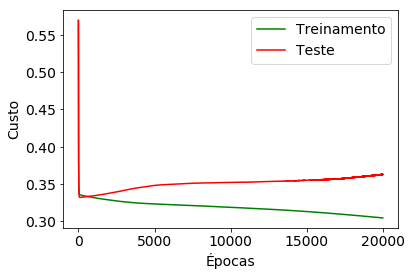

In [0]:
plt.plot(historia_custo,'g')
plt.plot(historia_custo_teste, 'r')
plt.legend(['Treinamento','Teste'])
plt.ylabel('Custo')
plt.xlabel('Épocas')
plt.show()

In [0]:
# Previsão
Y_pred, _ = propaga_total(np.transpose(X_teste), valores_parametros, arquitetura)

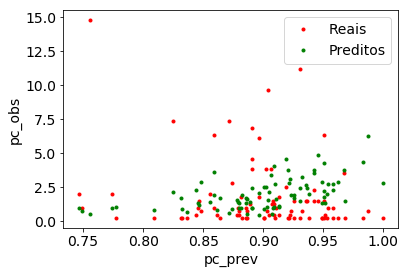

In [0]:
plt.plot(np.transpose(X_teste)[1],ymax*y_teste,'.r')
plt.plot(np.transpose(X_teste)[1],ymax*Y_pred.reshape([-1,1]),'.g')
plt.legend(['Reais','Preditos'])
plt.ylabel('pc_obs')
plt.xlabel('pc_prev')
plt.show()

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score

In [0]:
prev = []
real = []
for i in ymax*Y_pred.reshape([-1,1]):
    prev.append(i[0])
for i in ymax*y_teste:
    real.append(i)

In [0]:
dados['error'] = abs(dados['pc_prev'] - dados['pc_obs'])
dados['error'] = dados['error']/dados['pc_obs']
sum(dados['error'])/len(dados['error'])



1.0596899521419825

In [0]:
erro = abs(np.array(prev)-np.array(real))
sum(erro)/len(erro)


1.999857515787237